In [3]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory


In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("farzadnekouei/trash-type-image-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/trash-type-image-dataset


In [6]:
data_dir = '/kaggle/input/trash-type-image-dataset'

# Load the dataset using TensorFlow
train_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(180, 180),
    batch_size=32
)

val_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(180, 180),
    batch_size=32
)

class_names = train_ds.class_names
print("Classes:", class_names)


Found 2527 files belonging to 1 classes.
Using 2022 files for training.
Found 2527 files belonging to 1 classes.
Using 505 files for validation.
Classes: ['TrashType_Image_Dataset']


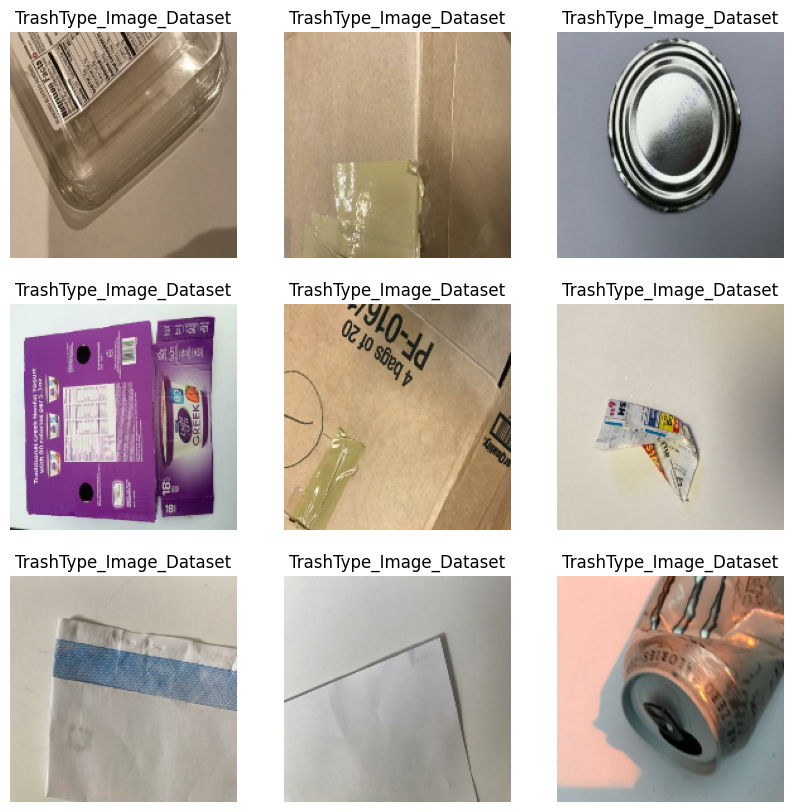

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
